# Regresión logística para predicciones bancarias

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importo Data

### Información de dataset
- job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
- marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
- education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
- default: has credit in default? (categorical: "no","yes","unknown")
- housing: has housing loan? (categorical: "no","yes","unknown")
- loan: has personal loan? (categorical: "no","yes","unknown")


**related with the last contact of the current campaign:**
- contact: contact communication type (categorical: "cellular","telephone")
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


**other attributes:**
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")


**social and economic context attributes**
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)


**Output variable (desired target):**
- y - has the client subscribed a term deposit? (binary: "yes","no")

In [281]:
data = pd.read_csv("bank.csv", sep=";")

In [282]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [283]:
data.shape

(4119, 21)

In [284]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

## Divido tabla en test y train

In [286]:
from sklearn.model_selection import train_test_split

X = data.loc[:,data.columns!="y"]
y = data.loc[:,"y"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size = 0.75, 
    test_size = 0.25
)

## Limpieza de datos

### Convierto las columnas de "yes" y "no" en un binario (0 o 1)

In [289]:
y_train = np.where(y_train=="yes", 1, 0)
y_test = np.where(y_test=="yes", 1, 0)

X_train["default"] = np.where(X_train["default"]=="yes", 1, 0)
X_test["default"] = np.where(X_test["default"]=="yes", 1, 0)

### Modifico columna de educacion para no quedarme con datos ambiguos al generar dummy

In [291]:
X_train["education"].unique()

array(['high.school', 'professional.course', 'basic.9y', 'unknown',
       'university.degree', 'basic.4y', 'basic.6y', 'illiterate'],
      dtype=object)

In [292]:
X_train["education"] = X_train["education"].map(
    {
        "basic.4y": "Basic",
        "basic.6y": "Basic",
        "basic.9y": "Basic",
        "high.school": "High School",
        "high.school": "High School",
        "professional.course": "Professional Course",
        "university.degree": "University Degree",
        "illiterate": "Illiterate",
        "unknown": "Unknown"
    }
)

X_test["education"] = X_test["education"].map(
    {
        "basic.4y": "Basic",
        "basic.6y": "Basic",
        "basic.9y": "Basic",
        "high.school": "High School",
        "high.school": "High School",
        "professional.course": "Professional Course",
        "university.degree": "University Degree",
        "illiterate": "Illiterate",
        "unknown": "Unknown"
    }
)

In [293]:
X_train["education"].unique()

array(['High School', 'Professional Course', 'Basic', 'Unknown',
       'University Degree', 'Illiterate'], dtype=object)

### Conversión de las variables categóricas a dummies

Identifico las variables categoricas, las mismas son:

["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]

In [296]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [297]:
X_train = pd.get_dummies(
    X_train, 
    columns=["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"],
    drop_first = True
)

X_test = pd.get_dummies(
    X_test, 
    columns=["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"],
    drop_first = True
)

In [298]:
X_train.columns

Index(['age', 'default', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_High School', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [299]:
X_test.columns

Index(['age', 'default', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_High School', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

#### Verifico que tengan mismas columnas

In [301]:
X_train.columns.size == X_test.columns.size

False

In [302]:
# busco columna que no esté en la tabla
acum = []
for i in X_test.columns:
    if i not in X_train.columns:
        acum.append(i)

acum

[]

In [303]:
# vamos a eliminarlas de testing para simplificar el problema.
X_train.drop('education_Illiterate',axis = "columns",inplace = True)

## Selección variables para el modelo

In [305]:
n = 12

In [306]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [307]:
lr = LogisticRegression(max_iter=1000000)

In [308]:
X_train.head()

,age,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
188,54,0,119,3,999,0,1.4,93.444,-36.1,4.963,...,False,False,False,False,False,False,True,False,True,False
1334,32,0,314,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False
1288,51,0,329,3,999,0,1.4,94.465,-41.8,4.961,...,False,False,False,False,True,False,False,False,True,False
2455,38,0,63,2,999,0,-1.8,92.843,-50.0,1.757,...,False,False,False,False,False,True,False,False,True,False
1701,43,0,127,1,999,0,-0.1,93.200,-42.0,4.153,...,False,True,False,False,False,False,True,False,True,False


In [309]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

In [310]:
print(rfe.support_)

[False False False False False  True False False False  True False False
 False  True False False False False False False False False False False
 False False False False False False False False False  True False  True
 False  True  True  True  True  True False False False False False  True
  True]


In [311]:
tabla_columnas = pd.DataFrame({
    "columna": X_train.columns, 
    "SeQueda": rfe.support_,
    "Posicion": rfe.ranking_
})
tabla_columnas.sort_values("Posicion")

,columna,SeQueda,Posicion
48,poutcome_success,True,1
33,contact_telephone,True,1
47,poutcome_nonexistent,True,1
37,month_jun,True,1
13,job_housemaid,True,1
38,month_mar,True,1
9,euribor3m,True,1
39,month_may,True,1
35,month_dec,True,1
5,previous,True,1


## Creo el modelo

In [313]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train.loc[:,rfe.support_], y_train)

LogisticRegression(max_iter=10000)

## Valido el modelo

In [315]:
X_test.loc[:,rfe.support_]

,previous,euribor3m,job_housemaid,contact_telephone,month_dec,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_nonexistent,poutcome_success
1913,0,4.864,False,True,False,True,False,False,False,False,True,False
3613,0,1.266,False,False,False,False,False,True,False,False,True,False
2880,0,1.334,False,False,False,False,False,True,False,False,True,False
3594,2,0.869,False,False,False,False,False,False,False,False,False,False
2655,0,4.970,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2442,1,1.266,False,False,False,False,False,True,False,False,False,False
876,0,4.857,False,True,False,False,False,True,False,False,True,False
741,0,0.797,True,True,False,False,False,False,False,False,True,False
2965,0,4.966,False,False,False,False,False,False,False,False,True,False


In [316]:
y_pred = logreg.predict(X_test.loc[:,rfe.support_]) # si no se aclara nada, por defecto el threshold es 0.5
y_pred_proba  = logreg.predict_proba(X_test.loc[:,rfe.support_])[:, 1] # obtengo el vector con probabilidades

## Creo Matriz de confusión

In [318]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [319]:
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[914,  11],
       [ 87,  18]], dtype=int64)

In [320]:
pd.DataFrame({"y_real" : y_test, "y_pred": y_pred}).groupby(["y_pred", "y_real"]).size()

y_pred  y_real
0       0         914
        1          87
1       0          11
        1          18
dtype: int64

In [321]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

### Accuracy

In [323]:
(TN + TP) / (TN + TP + FN + FP)

0.9048543689320389

### Sensibilidad

In [325]:
TP / (TP + FN)

0.17142857142857143

### Especificidad

In [327]:
TN / (TN + FP)

0.9881081081081081

## Curva ROC

In [329]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [330]:
# con la función roc_curve automaticamente calcula los valores de
# sensibilidad y 1-especificidad para distintos thresholds
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_pred_proba)

In [331]:
# verificar que para un threshold cercano a 0.5, los valores son como los calculados
print(f"Threshold = {threshold[11]}")
print(f"Sensibilidad = {sensibilidad[11]}")
print(f"Especificidad = {1-especificidad_inv[11]}")

Threshold = 0.639615976256232
Sensibilidad = 0.10476190476190476
Especificidad = 0.9935135135135135


In [332]:
import seaborn as sns

<Axes: >

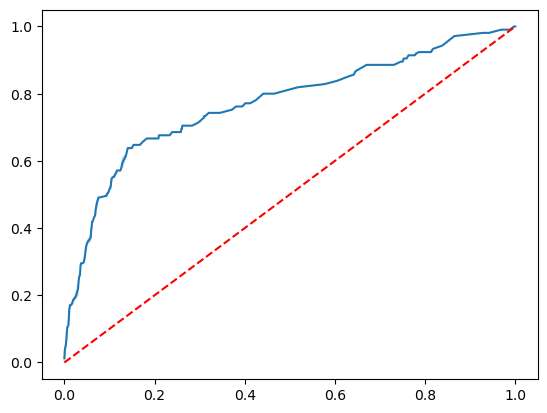

In [333]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_y, ls = "--", c = "r")

### Calcular área abajo de la curva

In [335]:
roc_auc_score(y_test, y_pred_proba)

0.7715366795366795